In [17]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.atr_rsi_strategy import (
    AtrRsiStrategy,
)
from vnpy.app.cta_strategy.strategies.turtle_signal_strategy import TurtleSignalStrategy
from datetime import datetime

In [20]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSD.BITFINEX",
    interval="1m",
    start=datetime(2017, 9, 1),
    end=datetime(2019, 9, 1),
    rate=0.3/1000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)
engine.add_strategy(TurtleSignalStrategy, {})

2019-10-24 14:57:55.955216	开始加载历史数据
2019-10-24 14:57:55.956216	加载进度： [4%]
2019-10-24 14:57:55.957217	加载进度： [8%]
2019-10-24 14:57:55.959216	加载进度：# [12%]
2019-10-24 14:57:55.961218	加载进度：# [16%]
2019-10-24 14:57:55.963233	加载进度：## [21%]
2019-10-24 14:57:55.966224	加载进度：## [25%]
2019-10-24 14:57:55.969219	加载进度：## [29%]
2019-10-24 14:57:55.972217	加载进度：### [33%]
2019-10-24 14:57:55.974222	加载进度：### [37%]
2019-10-24 14:57:55.979218	加载进度：#### [41%]
2019-10-24 14:57:55.981225	加载进度：#### [45%]
2019-10-24 14:57:55.988217	加载进度：#### [49%]
2019-10-24 14:57:55.989218	加载进度：##### [53%]
2019-10-24 14:57:55.996215	加载进度：##### [58%]
2019-10-24 14:57:55.998217	加载进度：###### [62%]
2019-10-24 14:57:56.005220	加载进度：###### [66%]
2019-10-24 14:57:56.007219	加载进度：###### [70%]
2019-10-24 14:57:56.009219	加载进度：####### [74%]
2019-10-24 14:57:56.015228	加载进度：####### [78%]
2019-10-24 14:57:56.017215	加载进度：######## [82%]
2019-10-24 14:57:56.021217	加载进度：######## [86%]
2019-10-24 14:57:56.029216	加载进度：######### [90%]
2019-10-24 14:5

c:\vnstudio207\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:373: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


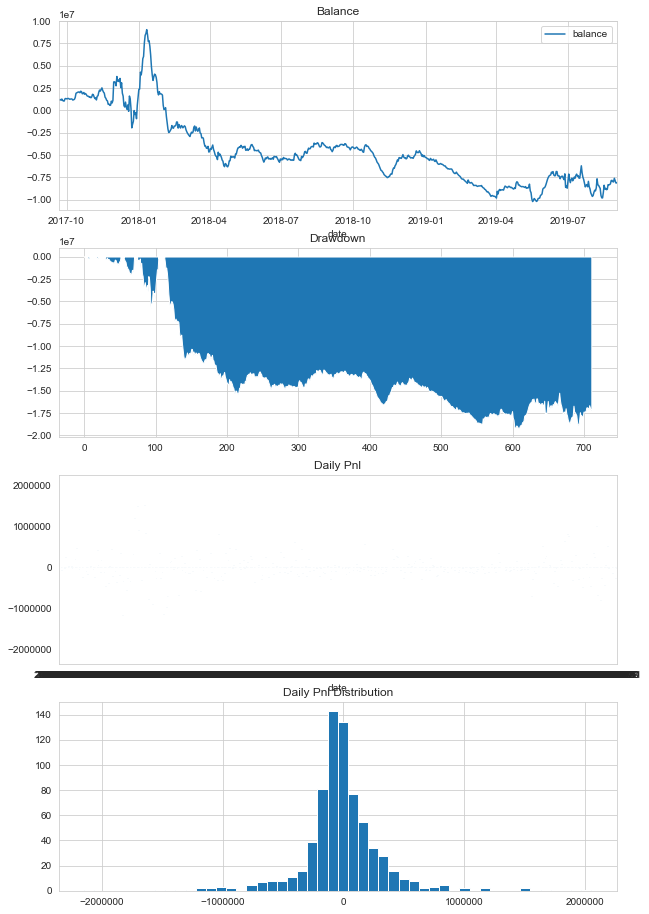

In [21]:
#%%`
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [22]:
setting = OptimizationSetting()
setting.set_target("total_return")
setting.add_parameter("entry_window", 5, 50, 5)
setting.add_parameter("exit_window", 10, 100, 5)
setting.add_parameter("atr_window",10, 100, 5)

engine.run_ga_optimization(setting)

2019-10-24 15:25:19.438805	参数优化空间：3610
2019-10-24 15:25:19.438805	每代族群总数：100
2019-10-24 15:25:19.438805	优良筛选个数：80
2019-10-24 15:25:19.438805	迭代次数：30
2019-10-24 15:25:19.438805	交叉概率：95%
2019-10-24 15:25:19.438805	突变概率：5%
2019-10-24 15:25:19.438805	开始加载历史数据
2019-10-24 15:25:19.439770	加载进度： [4%]
2019-10-24 15:25:19.441770	加载进度： [8%]
2019-10-24 15:25:19.443790	加载进度：# [12%]
2019-10-24 15:25:19.446773	加载进度：# [16%]
2019-10-24 15:25:19.449779	加载进度：## [21%]
2019-10-24 15:25:19.453781	加载进度：## [25%]
2019-10-24 15:25:19.457767	加载进度：## [29%]
2019-10-24 15:25:19.460767	加载进度：### [33%]
2019-10-24 15:25:19.462767	加载进度：### [37%]
2019-10-24 15:25:19.468771	加载进度：#### [41%]
2019-10-24 15:25:19.472791	加载进度：#### [45%]
2019-10-24 15:25:19.476801	加载进度：#### [49%]
2019-10-24 15:25:19.478797	加载进度：##### [53%]
2019-10-24 15:25:19.482797	加载进度：##### [58%]
2019-10-24 15:25:19.483797	加载进度：###### [62%]
2019-10-24 15:25:19.490773	加载进度：###### [66%]
2019-10-24 15:25:19.492779	加载进度：###### [70%]
2019-10-24 15:25:19.494768	加载

c:\vnstudio207\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:373: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


2019-10-24 15:26:31.446313	策略初始化完成
2019-10-24 15:26:31.447313	开始回放历史数据
2019-10-24 15:27:54.766316	历史数据回放结束
2019-10-24 15:27:54.766316	开始计算逐日盯市盈亏
2019-10-24 15:27:55.014315	逐日盯市盈亏计算完成
2019-10-24 15:27:55.014315	开始计算策略统计指标
2019-10-24 15:27:55.026315	开始加载历史数据
2019-10-24 15:27:55.027318	加载进度： [4%]
2019-10-24 15:27:55.028316	加载进度： [8%]
2019-10-24 15:27:55.029315	加载进度：# [12%]
2019-10-24 15:27:55.031321	加载进度：# [16%]
2019-10-24 15:27:55.033315	加载进度：## [21%]
2019-10-24 15:27:55.039317	加载进度：## [25%]
2019-10-24 15:27:55.044317	加载进度：## [29%]
2019-10-24 15:27:55.047314	加载进度：### [33%]
2019-10-24 15:27:55.048314	加载进度：### [37%]
2019-10-24 15:27:55.051314	加载进度：#### [41%]
2019-10-24 15:27:55.054323	加载进度：#### [45%]
2019-10-24 15:27:55.058318	加载进度：#### [49%]
2019-10-24 15:27:55.059316	加载进度：##### [53%]
2019-10-24 15:27:55.064314	加载进度：##### [58%]
2019-10-24 15:27:55.065315	加载进度：###### [62%]
2019-10-24 15:27:55.072316	加载进度：###### [66%]
2019-10-24 15:27:55.075346	加载进度：###### [70%]
2019-10-24 15:27:55.077332	加

ValueError: cannot convert NaN to integer